# Clasificación multiclase con redes neuronales en Keras
___

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [2]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

## Importar Dataset

In [3]:
#https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

## Explorar el dataset

#### Conjunto de entrenamiento

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

In [6]:
y_train_full.shape

(60000,)

In [7]:
y_train_full[0]

9

#### Conjunto de prueba

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
y_test.shape

(10000,)

#### Visualizando una instancia

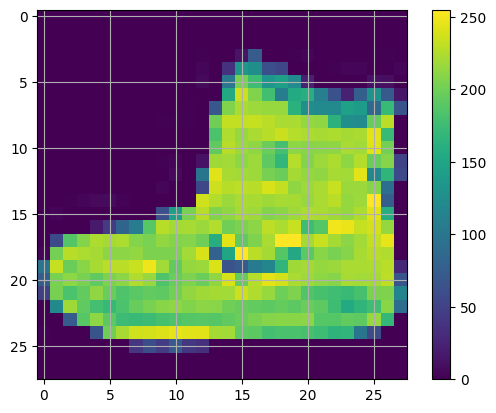

In [10]:
plt.figure()
plt.imshow(X_train_full[0])
plt.colorbar()
plt.grid(True)
plt.show()

#### Clases

In [15]:
y_train_full[0]

9

In [16]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [17]:
class_names[y_train_full[0]]

'Ankle boot'

#### Visualizando las primeras 25 instancias

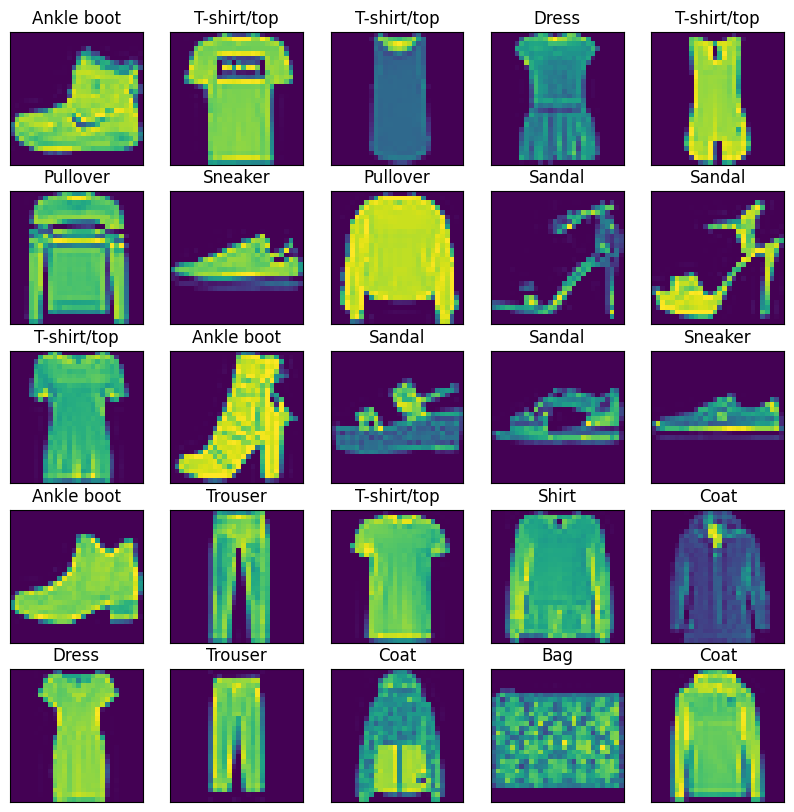

In [14]:
plt.figure(figsize=(10,10))
for i in range(0,25):
    plt.subplot(5,5, i+1)
    plt.imshow(X_train_full[i])
    #plt.imshow(X_train_full[i], cmap=plt.cm.binary)
    plt.title(class_names[(y_train_full[i])])
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
plt.show()

## Preprocesamiento

#### Escalamiento de características

In [18]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [19]:
X_train_full = X_train_full / 255
X_test = X_test / 255

In [20]:
X_train_full.dtype

dtype('float64')

In [21]:
X_train_full[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Crear conjunto de validación

In [22]:
# Separar el conjunto de entrenamiento completo en validación y entrenamiento
X_train = X_train_full[:55000]
y_train = y_train_full[:55000]

X_validation = X_train_full[55000:]
y_validation = y_train_full[55000:]

In [23]:
X_validation.shape

(5000, 28, 28)

In [24]:
X_train.shape

(55000, 28, 28)

# Modelo

#### Crear el modelo y añadir capas

In [26]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras import models

model = keras.models.Sequential()
model.add(layers.Conv2D(16, (3,3), activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='relu'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 64)          0

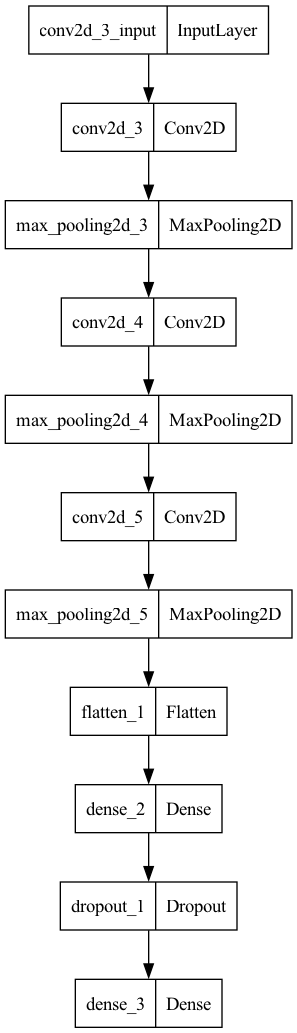

In [27]:
keras.utils.plot_model(model)

In [28]:
model.layers

#### Analizando W y b ¿Cómo se inicializan los W y b?

In [29]:
from keras.utils import to_categorical

In [30]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
X_validation = X_validation.reshape((X_validation.shape[0], 28, 28, 1))

In [31]:
train_labels = to_categorical(y_train)
validation_labels = to_categorical(y_validation)
test_labels = to_categorical(y_test)

# Configurar el proceso de aprendizaje (Compilar)
Se especifica:
- Loss function
- Optimizer
- Metrics (Opcional, en caso de querer observar métricas extra durante el entrenamiento o evaluación)

In [32]:
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-4),
             loss='binary_crossentropy',
             metrics=['accuracy'])

# Entrenamiento y evaluación en datos de validación
Los datos de validación son opcionales, pero si los pasamos como parámetros en el método `fit()`, Keras medirá el loss y las demás métricas que le indiquemos sobre el conjunto de validación al final de cada época.

Se pueden pasar como parámetros los datos de validación con `validation_data`. Si se usa `validation_split`, la fracción de datos que indiquemos será usada como validación (se tomarán los datos del final del conjunto y no se usarán en el entrenamiento). `validation_data` sobrescribe `validation_split`.

- Si el performance es mucho mejor en el conjunto de entrenamiento que en el de validación hay ->

In [33]:
# Si quieres usar el conjunto de validación hecho por ti
history = model.fit(X_train,
                    train_labels,
                    epochs=10,
                    batch_size=64,
                    validation_data=(X_validation,validation_labels))


# Si quieres que Keras cree el conjunto de validación
#history = model.fit(X_train_full,
                    #y_train_full,
                    #epochs=__,
                    #batch_size=__,
                    #validation_split=0.1)

Epoch 1/10
860/860 [==============================] - 10s 11ms/step - loss: 0.8303 - accuracy: 0.9000 - val_loss: 0.3887 - val_accuracy: 0.9000
Epoch 2/10
860/860 [==============================] - 9s 11ms/step - loss: 0.6216 - accuracy: 0.9000 - val_loss: 0.3491 - val_accuracy: 0.9000
Epoch 3/10
860/860 [==============================] - 10s 11ms/step - loss: 0.5564 - accuracy: 0.9000 - val_loss: 0.3388 - val_accuracy: 0.9000
Epoch 4/10
860/860 [==============================] - 10s 12ms/step - loss: 0.5176 - accuracy: 0.9000 - val_loss: 0.3354 - val_accuracy: 0.9000
Epoch 5/10
860/860 [==============================] - 10s 11ms/step - loss: 0.4904 - accuracy: 0.8999 - val_loss: 0.3352 - val_accuracy: 0.9000
Epoch 6/10
860/860 [==============================] - 10s 12ms/step - loss: 0.4855 - accuracy: 0.9000 - val_loss: 0.3353 - val_accuracy: 0.9000
Epoch 7/10
860/860 [==============================] - 10s 11ms/step - loss: 0.4798 - accuracy: 0.8999 - val_loss: 0.3352 - val_accuracy: 

#### History

Objeto regresado por el método `fit()` que contiene:
- Parámetros de entrenamiento
- La lísta de épocas
- Loss y métricas obtenidas al final de cada época

In [34]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 860}

In [35]:
history.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [36]:
history.history

{'loss': [0.8302810788154602,
  0.6215656995773315,
  0.5563815832138062,
  0.5176430940628052,
  0.4904095530509949,
  0.48546141386032104,
  0.47977402806282043,
  0.47073736786842346,
  0.4672611653804779,
  0.4614773094654083],
 'accuracy': [0.9000054597854614,
  0.8999909162521362,
  0.9000054597854614,
  0.8999909162521362,
  0.8999327421188354,
  0.8999618887901306,
  0.8999472856521606,
  0.8998308777809143,
  0.8999037146568298,
  0.8999035954475403],
 'val_loss': [0.3886934220790863,
  0.3491375148296356,
  0.3388291299343109,
  0.33541998267173767,
  0.33522799611091614,
  0.3352520167827606,
  0.33524957299232483,
  0.33536091446876526,
  0.3353802561759949,
  0.3356724977493286],
 'val_accuracy': [0.9000006914138794,
  0.9000006914138794,
  0.9000006914138794,
  0.9000006914138794,
  0.9000006914138794,
  0.9000006914138794,
  0.9000006914138794,
  0.9000006914138794,
  0.9000006914138794,
  0.9000006914138794]}

#### Curvas de aprendizaje

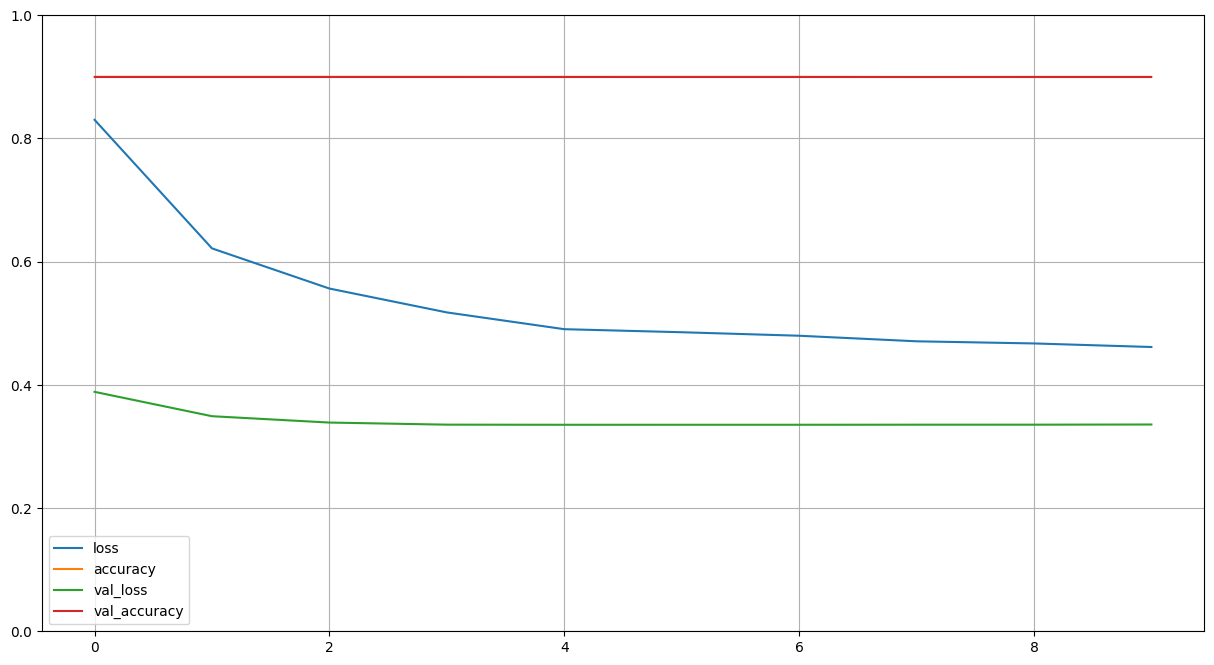

In [37]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(15, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [38]:
#Si quisiéramos seguir entrenando usando nuestro conjunto de validación
history2 = model.fit(X_train,
                     train_labels,
                     epochs=20,
                     batch_size=32,
                     validation_data=(X_validation,validation_labels),
                     initial_epoch= 10)


#Si quisiéramos seguir entrenando usando el conjunto de validación creado por Keras
#history2 = model.fit(X_train_full,
                     #y_train_full,
                     #epochs=90,
                     #batch_size=32,
                     #validation_split=0.1,
                     #initial_epoch=10)

Epoch 11/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4553 - accuracy: 0.8999 - val_loss: 0.3361 - val_accuracy: 0.9000
Epoch 12/20
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4452 - accuracy: 0.8999 - val_loss: 0.3365 - val_accuracy: 0.9000
Epoch 13/20
1719/1719 [==============================] - 11s 7ms/step - loss: 0.4378 - accuracy: 0.8999 - val_loss: 0.3367 - val_accuracy: 0.9000
Epoch 14/20
1719/1719 [==============================] - 11s 7ms/step - loss: 0.4329 - accuracy: 0.8999 - val_loss: 0.3371 - val_accuracy: 0.9000
Epoch 15/20
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4283 - accuracy: 0.8999 - val_loss: 0.3375 - val_accuracy: 0.9000
Epoch 16/20
1719/1719 [==============================] - 17s 10ms/step - loss: 0.4249 - accuracy: 0.8998 - val_loss: 0.3378 - val_accuracy: 0.9000
Epoch 17/20
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4216 - accuracy: 0.8999 - val_loss: 0.3381 

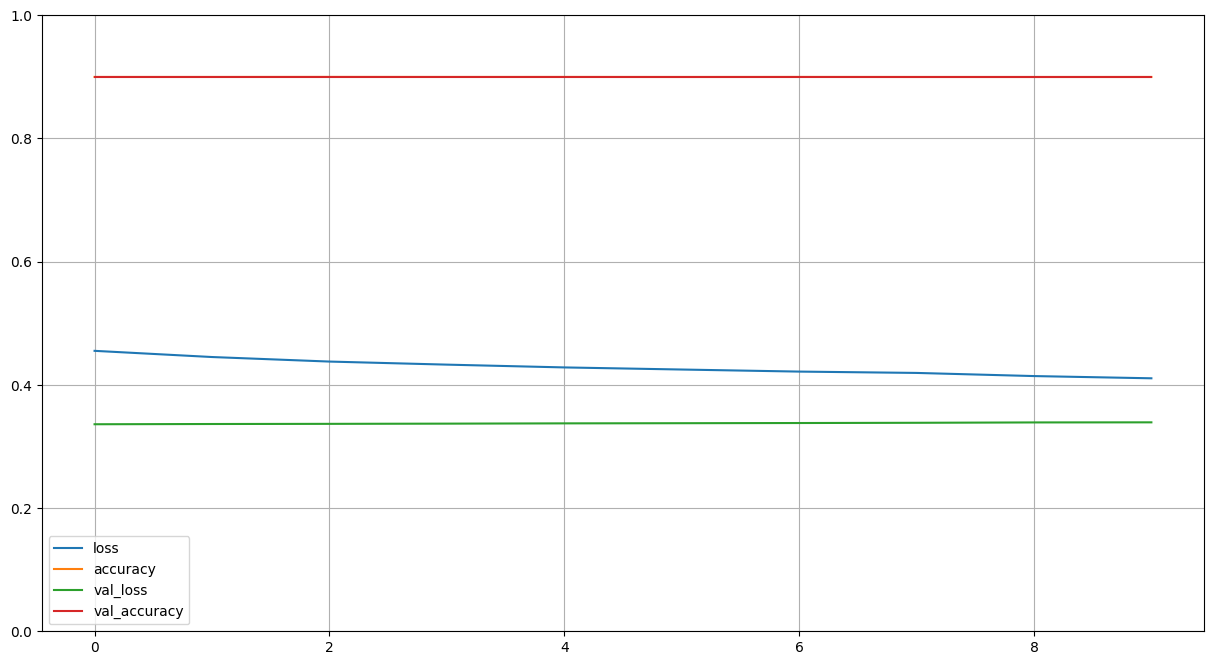

In [39]:
#Si quisiéramos ver las curvas de aprendizaje de un segundo entrenamiento
pd.DataFrame(history2.history).plot(figsize=(15, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# Evaluación en conjunto de prueba

Estimamos el error de generalización.

In [40]:
loss_and_metrics = model.evaluate(X_test, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3389 - accuracy: 0.9000


# Predicción en nuevos datos

In [41]:
X_new = X_test[:5]

#### Probabilidad estimada por clase

In [42]:
y_proba = model.predict(X_new).round(2)
y_proba

1/1 [==============================] - 0s 124ms/step


array([[0.05],
       [0.21],
       [0.19],
       [0.14],
       [0.12]], dtype=float32)

#### Clase con mayor probabilidad

In [45]:
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 19ms/step


array([[0.04991044],
       [0.20586352],
       [0.18563873],
       [0.13737406],
       [0.12428745]], dtype=float32)

In [50]:
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

# Guardar y restaurar el modelo

#### Guardar modelo

In [51]:
model.save('keras_fashion.h5') #En formato HDF5

/Users/fernankiwi/.pyenv/versions/3.11.0/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#### Restaurar un modelo

In [52]:
model = keras.models.load_model('keras_fashion.h5')

In [54]:
X_new = X_test[:5] # pretend these are new instances
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 58ms/step


array([[0.04991044],
       [0.20586352],
       [0.18563873],
       [0.13737406],
       [0.12428745]], dtype=float32)

# Reset model

In [55]:
tf.keras.backend.clear_session()